In [117]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
time1 = time()

In [118]:
transform = transforms.Compose([transforms.ToTensor()
                              ])

In [119]:

trainset = datasets.ImageFolder('cifar/train', transform=transform)
valset = datasets.ImageFolder('cifar/test', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [120]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


Classes :  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog']


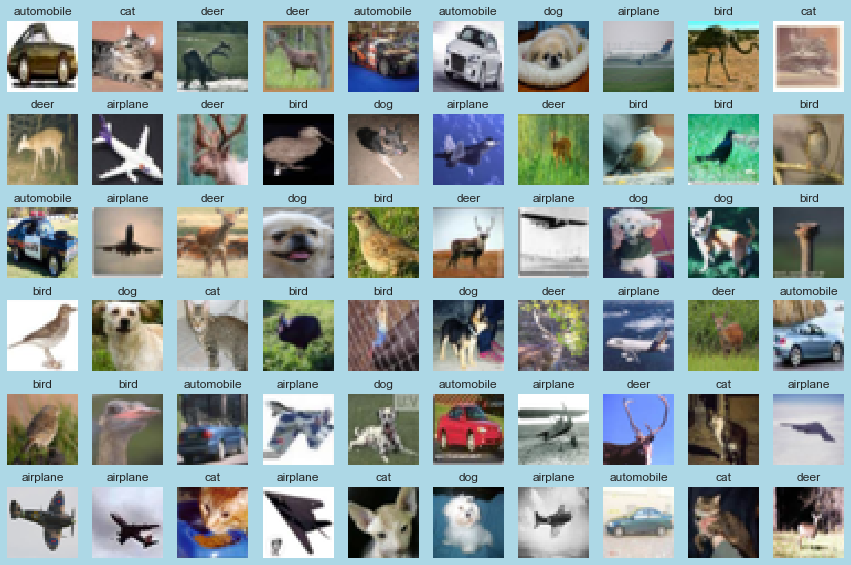

In [121]:
class_list = trainset.classes
figure = plt.figure(figsize=(15,10))
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(np.rot90(np.rot90(np.rot90(images[index].numpy().T))), interpolation="nearest")
    plt.title(class_list[labels[index]])

print('Classes : ', class_list)

In [122]:
input_size = 3072
hidden_sizes = [1024, 512, 128]
output_size = len(class_list)

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                            nn.ReLU(),
                            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                            nn.ReLU(),
                            nn.Dropout(0.1),
                            nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                            nn.ReLU(),
                            nn.Dropout(0.1),
                            nn.Linear(hidden_sizes[2], output_size),
                            nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=3072, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.1, inplace=False)
  (5): Linear(in_features=512, out_features=128, bias=True)
  (6): ReLU()
  (7): Dropout(p=0.1, inplace=False)
  (8): Linear(in_features=128, out_features=6, bias=True)
  (9): LogSoftmax(dim=1)
)


In [123]:

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities

criterion = nn.NLLLoss()

#tlabls = labelTransform(labels,10)
loss = criterion(logps,labels) #calculate the loss


In [124]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-6.6060e-05, -3.4666e-05, -3.9956e-05,  ...,  1.0773e-04,
          1.4190e-04,  1.1036e-04],
        [-1.6557e-04, -1.3504e-04, -1.4523e-04,  ..., -9.1684e-05,
         -9.7209e-05, -1.2576e-04],
        [-1.1902e-04, -1.1996e-04, -1.2161e-04,  ..., -8.7862e-05,
         -8.0786e-05, -7.6450e-05],
        ...,
        [ 6.2465e-05,  7.6620e-05,  5.4360e-05,  ...,  1.9697e-04,
          2.1224e-04,  1.9088e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])


In [125]:
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.8)
time0 = time()
epochs = 50
for e in range(epochs):
    running_loss = 0
    cnt=0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        cnt+=images.shape[0]
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {} no of images {}".format(e, running_loss/len(trainloader),cnt))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 1.7616344319223596 no of images 30000
Epoch 1 - Training loss: 1.6358584928105888 no of images 30000
Epoch 2 - Training loss: 1.5228386914043792 no of images 30000
Epoch 3 - Training loss: 1.4565905393567928 no of images 30000
Epoch 4 - Training loss: 1.4017526389185044 no of images 30000
Epoch 5 - Training loss: 1.3534654017958814 no of images 30000
Epoch 6 - Training loss: 1.3155179504138321 no of images 30000
Epoch 7 - Training loss: 1.2886518290810494 no of images 30000
Epoch 8 - Training loss: 1.2627398872426323 no of images 30000
Epoch 9 - Training loss: 1.242264667045333 no of images 30000
Epoch 10 - Training loss: 1.2204213139853244 no of images 30000
Epoch 11 - Training loss: 1.2026035464140399 no of images 30000
Epoch 12 - Training loss: 1.1846366674661128 no of images 30000
Epoch 13 - Training loss: 1.1673943509679359 no of images 30000
Epoch 14 - Training loss: 1.1504936228428821 no of images 30000
Epoch 15 - Training loss: 1.135045137105466 no of i

In [126]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(np.rot90(np.rot90(np.rot90(img.numpy().T))))
    ax1.axis('off')
    ax2.barh(np.arange(len(class_list)), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(class_list)))
    ax2.set_yticklabels(class_list)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Class = tensor([[8.0230e-04, 9.9787e-01, 6.5739e-05, 7.0865e-04, 2.4853e-04, 3.0212e-04]])
Predicted Class = automobile
Actual Class = automobile


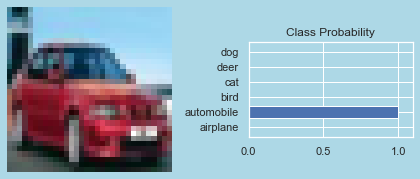

In [127]:
images, labels = next(iter(valloader))

img = images[0].view(1, input_size)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
print("Predicted Class =", ps)
print("Predicted Class =", class_list[np.argmax(ps)])
print("Actual Class =", class_list[labels[0]])
view_classify(img.view(3, 32, 32), ps)

In [128]:
correct_count, all_count = 0, 0
pred_label_arr = [[],[]]
true_label_arr =[[],[]]
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 3072)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = np.argmax(ps)
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
    pred_label_arr[0].append(pred_label)
    true_label_arr[0].append(true_label)
print("Number Of Images Tested =", all_count)
print("\nModel Test Accuracy =", (correct_count/all_count))
images,labels = iter(trainloader).next()
for i in range(len(labels)):
  img = images[i].view(1, 3072)
  # Turn off gradients to speed up this part
  with torch.no_grad():
      logps = model(img)

  # Output of the network are log-probabilities, need to take exponential for probabilities
  ps = torch.exp(logps)
  probab = list(ps.numpy()[0])
  pred_label = np.argmax(ps)
  true_label = labels.numpy()[i]
  if(true_label == pred_label):
    correct_count += 1
  all_count += 1
  pred_label_arr[1].append(pred_label)
  true_label_arr[1].append(true_label)
print("Number Of Images Tested =", all_count)
print("\nModel Train Accuracy =", (correct_count/all_count))

Number Of Images Tested = 6000

Model Test Accuracy = 0.6056666666666667
Number Of Images Tested = 6064

Model Train Accuracy = 0.6070250659630607


In [129]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

def confusionMatrixAndAccuracyReport(Y_test, Y_pred):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = np.trace(cm)/sum(cm.flatten())

    classwiseAccuracy = np.zeros(len(cm))
    for n in range(len(cm)):
        for i in range(len(cm)):
            for j in range(len(cm)):
                if (i != n and j != n) or (i == n and j == n):
                    classwiseAccuracy[n] += cm[i][j]

    classwiseAccuracy /= sum(cm.flatten())

    plt.figure(figsize=(10,10))
    plt.title('Accuracy Score: {0:3.3f}'.format(overallAccuracy), size=12)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues', fmt='g')

    plt.show()
    print('Overall Accuracy Score: {0:3.3f}'.format(overallAccuracy))
    print('Classwise Accuracy Score: {0}'.format(classwiseAccuracy))


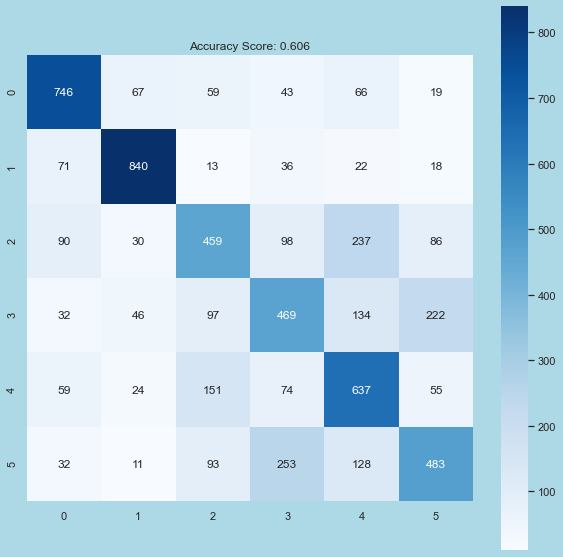

Overall Accuracy Score: 0.606
Classwise Accuracy Score: [0.91033333 0.94366667 0.841      0.8275     0.84166667 0.84716667]


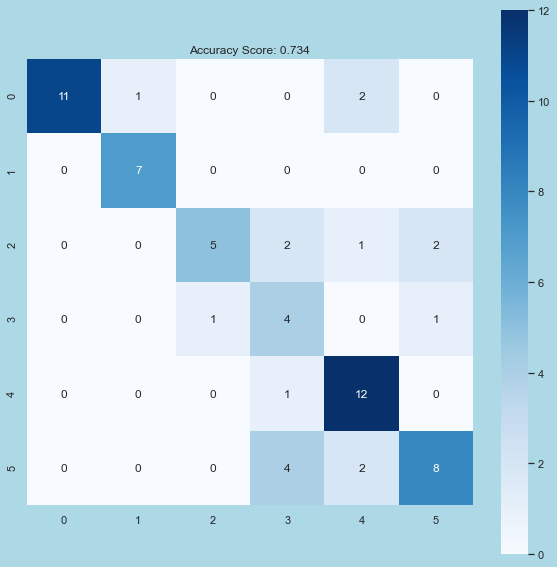

Overall Accuracy Score: 0.734
Classwise Accuracy Score: [0.953125 0.984375 0.90625  0.859375 0.90625  0.859375]

All done (in minutes) = 27.35228765408198


In [130]:

confusionMatrixAndAccuracyReport(true_label_arr[0],pred_label_arr[0])
confusionMatrixAndAccuracyReport(true_label_arr[1],pred_label_arr[1])
print("\nAll done (in minutes) =",(time()-time1)/60)